In [17]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy import stats

In [18]:
# Import dataset
datasetR = pd.read_csv('Advertising.csv')
datasetR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
datasetR.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


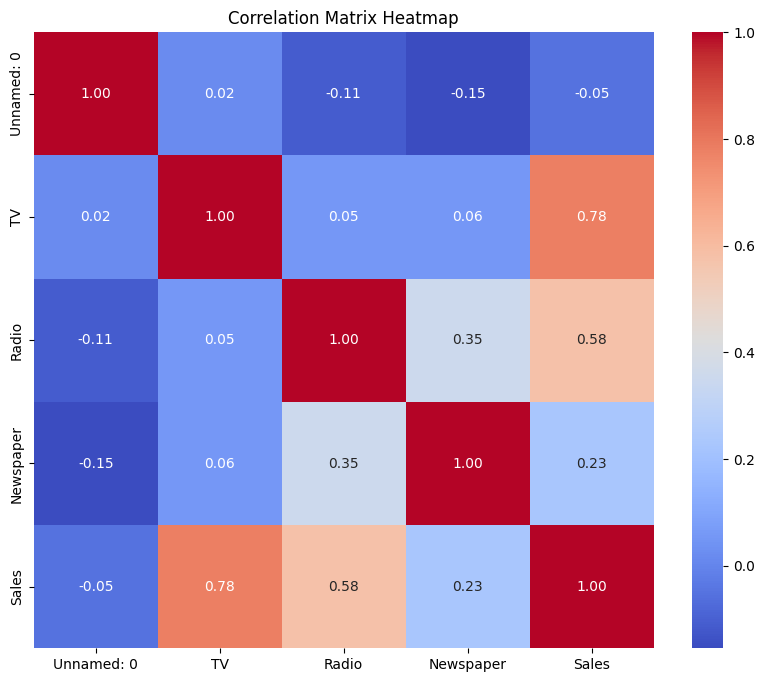

In [20]:
# Menghitung matriks korelasi
correlation_matrix = datasetR.corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
# Hapus outliers dengan z-score method
z_scores = np.abs(stats.zscore(datasetR))
threshold = 3
cleaned_data = datasetR[(z_scores < threshold).all(axis=1)]

In [22]:
# Split data menjadi features (X) dan target variable (y)
X = cleaned_data.iloc[:, [1]].values
y = cleaned_data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting Regression model to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

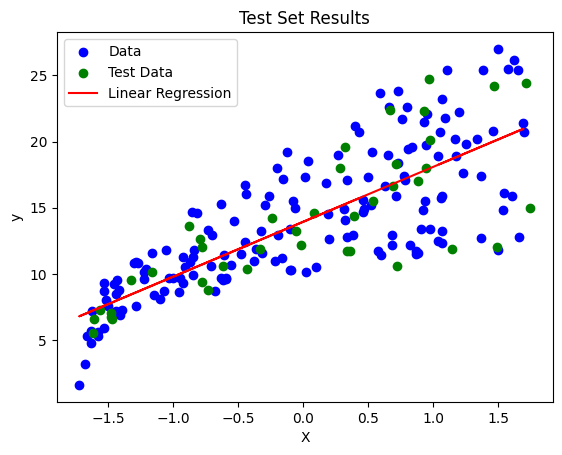

In [23]:
# Visualisasi model regresi linear sederhana
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Linear Regression')
plt.title('Test Set Results')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()